In [7]:
options(warn = -1)

suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))

In [8]:
input_dir <- "../../results/07_marchphages/04_cell_state_score"

In [45]:
pt.size.factor <- c('HC01' = 2, 'HC02' = 12, 'HC03' = 12.5, 'HC05' = 18, 
                 'SSc4994' = 5, 'SSc5380' = 2, 
                 'SSc-HL01' = 18, 'SSc-HL05' = 5, 'SSc-HL06' = 13, 'SSc-HL11' = 10.5,
                 'SSc-HL13' = 20, 'SSc-HL25' = 18, 'SSc-HL33' = 9, 'SSc-HL35' = 10)

In [46]:
df_all <- lapply(names(pt.size.factor), function(sample){
    obj <- readRDS(glue::glue("{input_dir}/{sample}.rds"))
    df <- obj@meta.data
    df <- df[, (ncol(df) - 2):ncol(df)]
    colnames(df) <- c("Antigen_presenting", "Phagocytic", "Pro_inflammatory")
    df$sample <- sample
    
    if(sample %in% c('HC01', 'HC02', 'HC03', 'HC05')){
        df$condition <- "Healthy"
    }else{
        df$condition <- "SSc"
    }
    
    return(df)
}) %>% do.call(rbind, .) %>%
    dplyr::group_by(sample, condition) %>%
    dplyr::summarise(mean_antigen = mean(Antigen_presenting),
                     mean_phagocytic = mean(Phagocytic),
                     mean_pro_inflammatory = mean(Pro_inflammatory)) %>%
    tidyr::pivot_longer(cols = c(mean_antigen, mean_phagocytic, mean_pro_inflammatory),
                        names_to = "sub_cluster", values_to = "module_score")

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


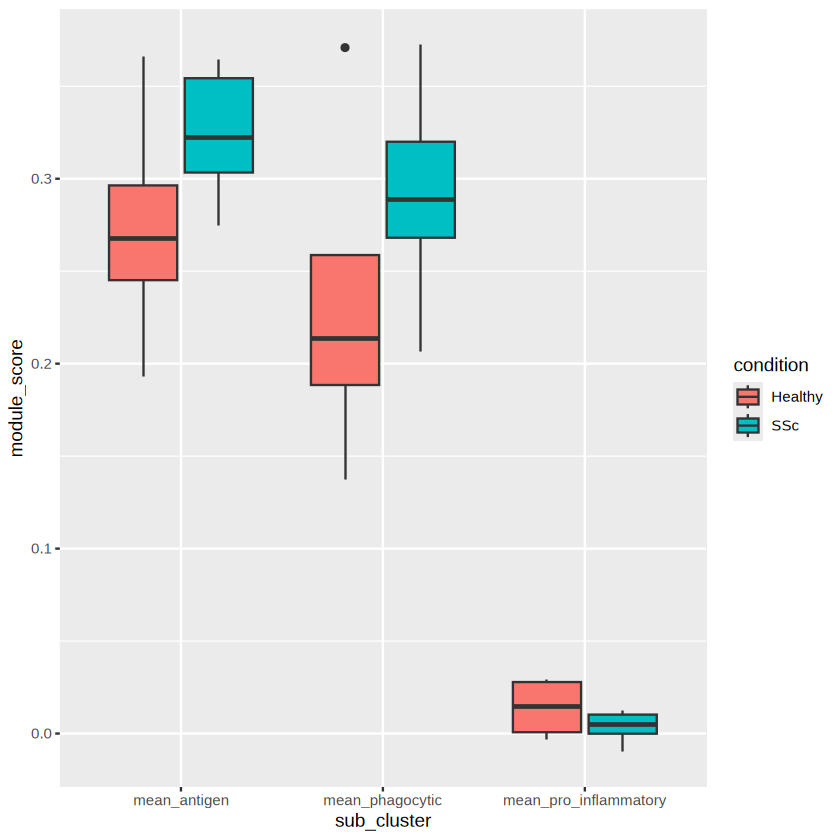

In [47]:
p <- ggplot(data = df_all, aes(x = sub_cluster, y = module_score)) +
    geom_boxplot(aes(fill = condition))

print(p)